### Importar bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

### Carregar dataset

In [2]:
df = pd.read_csv(r"bank-full.csv", sep=";")

### Pré-processamento
#### Tratar valores desconhecidos
Usar os valores modais em variáveis categóricas que possuem valores desconhecidos.

In [3]:
df["job"] = df["job"].replace("unknown", "blue-collar")
df["education"] = df["education"].replace('unknown', 'secondary')
df["contact"] = df["contact"].replace('unknown', 'cellular')

#### Remover colunas
81.75% do atributo `poutcome` está como valor desconhecido, remover a coluna `poutcome`. Remover também a coluna `duration`.

In [4]:
df.drop(columns=["poutcome","duration"], inplace=True)

#### Codificar variáveis alvo e `default`

In [5]:
df['y'] = df['y'].replace({"yes": 1, "no": 0})
df['default'] = df["default"].replace({"yes": 1, "no": 0})

/tmp/ipykernel_19463/868126481.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({"yes": 1, "no": 0})
/tmp/ipykernel_19463/868126481.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['default'] = df["default"].replace({"yes": 1, "no": 0})


#### Codificação de variáveis categóricas

In [6]:
# Listas de variáveis categóricas
nominal_features = ["job", "marital", "housing", "loan", "contact"]
ordinal_features = ["education", "month"]

# Codificação em variaveis nominais
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Codificação em variaveis categóricas ordinais
label_encoder = LabelEncoder()

for col in ordinal_features:
    df[col] = label_encoder.fit_transform(df[col])

df.replace({True: 1, False: 0}, inplace=True)

/tmp/ipykernel_19463/2650049904.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0}, inplace=True)


#### Normalização de variáveis numéricas
Analisar a distribuição das variáveis e verificar outliers.
`age`: assimétrica / `balance`: assimétrica / `campaign`: assimétrica / `pdays`: assimétrica / `previous` : assimétrica
Há uma distribuição assimétrica, fazer uma normalização com MinMaxScaler.

In [7]:
# Criar o normalizador das variaveis numéricas
scaler = MinMaxScaler()
# Aplicar normalização a todas as variáveis assimétricas
cols_to_normalize = ['age', 'balance', 'campaign', 'pdays', 'previous', 'day']
for col in cols_to_normalize:
    df[f"{col}_normalizado"] = scaler.fit_transform(df[[col]])

### Análise exploratória e visualização
#### Histograma idade MinMaxScaler
Comparação antes e depois do MinMaxScaler para a variável `age`.

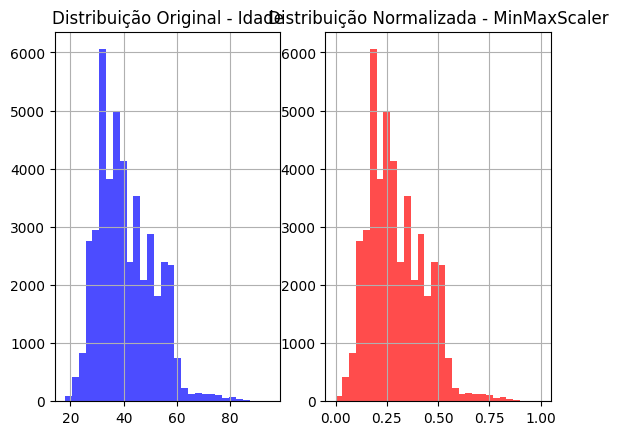

In [8]:
plt.subplot(1,2,1)
df['age'].hist(bins=30, alpha=0.7, color='b')
plt.title("Distribuição Original - Idade")
plt.subplot(1,2,2)
df['age_normalizado'].hist(bins=30, alpha=0.7, color='r')
plt.title("Distribuição Normalizada - MinMaxScaler")
plt.show()

#### Analisar outliers `balance`

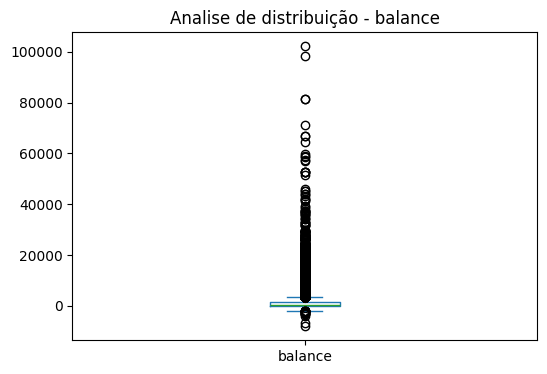

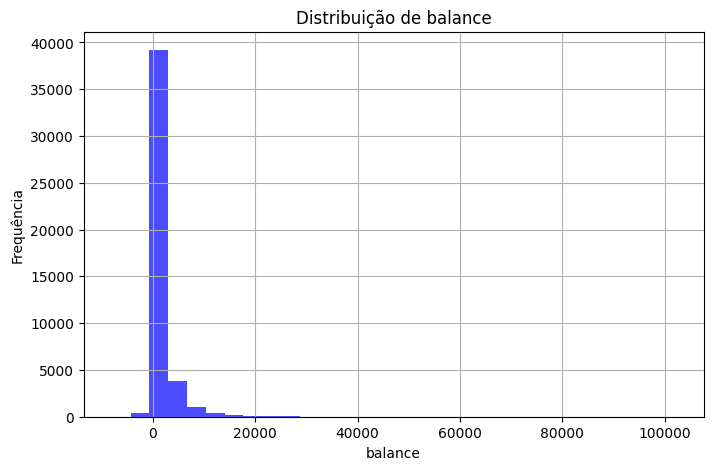

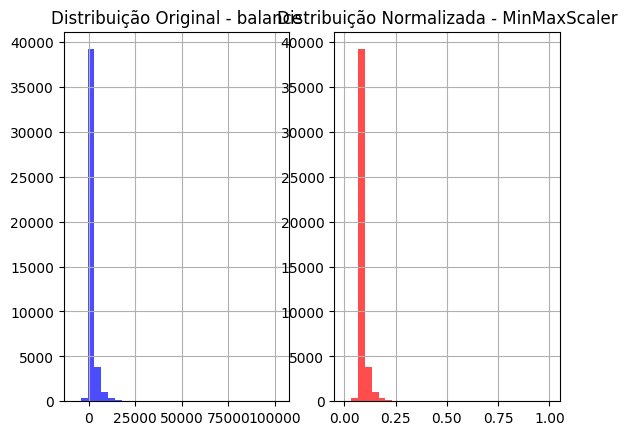

In [9]:
# Boxplot balance:
df['balance'].plot(kind='box', figsize=(6,4))
plt.title("Analise de distribuição - balance")
plt.show()
# Histograma balance:
df['balance'].hist(bins=30, figsize=(8,5), alpha=0.7, color='b')
plt.title("Distribuição de balance")
plt.xlabel("balance")
plt.ylabel("Frequência")
plt.show()

# Comparação antes e depois do MinMaxScaler
plt.subplot(1,2,1)
df['balance'].hist(bins=30, alpha=0.7, color='b')
plt.title("Distribuição Original - balance")
plt.subplot(1,2,2)
df['balance_normalizado'].hist(bins=30, alpha=0.7, color='r')
plt.title("Distribuição Normalizada - MinMaxScaler")
plt.show()

#### Analisar outliers `day`

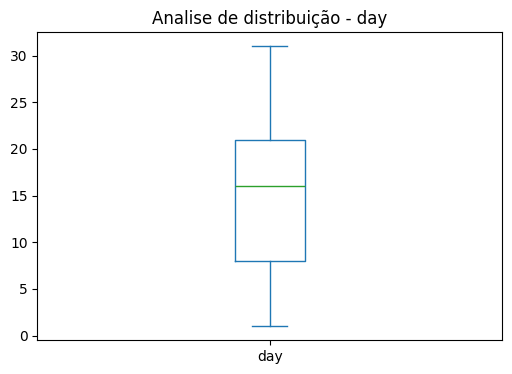

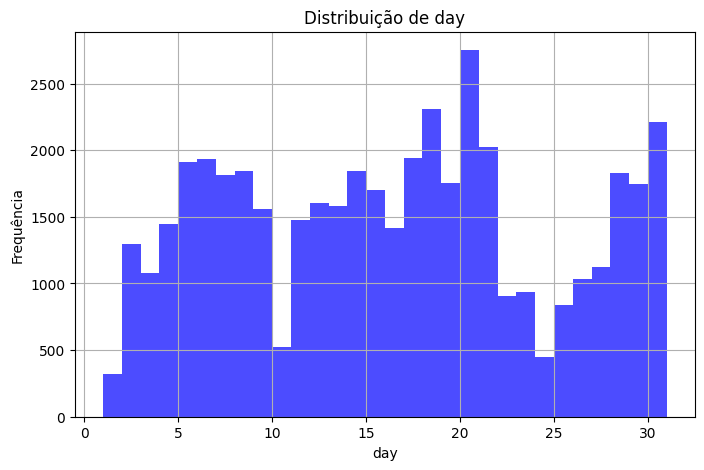

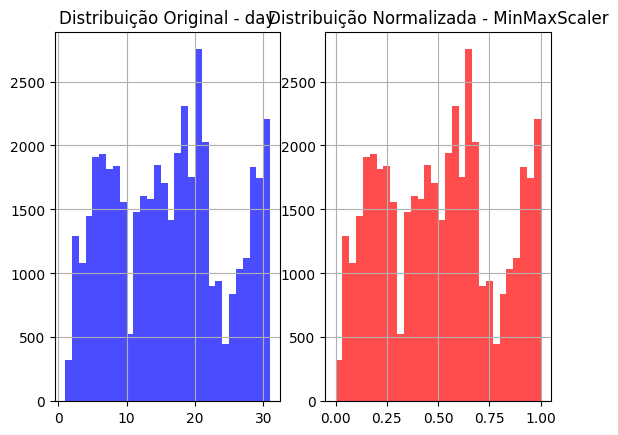

In [10]:
# Boxplot day:
df['day'].plot(kind='box', figsize=(6,4))
plt.title("Analise de distribuição - day")
plt.show()
# Histograma balance:
df['day'].hist(bins=30, figsize=(8,5), alpha=0.7, color='b')
plt.title("Distribuição de day")
plt.xlabel("day")
plt.ylabel("Frequência")
plt.show()
# Comparação antes e depois do MinMaxScaler
plt.subplot(1,2,1)
df['day'].hist(bins=30, alpha=0.7, color='b')
plt.title("Distribuição Original - day")
plt.subplot(1,2,2)
df['day_normalizado'].hist(bins=30, alpha=0.7, color='r')
plt.title("Distribuição Normalizada - MinMaxScaler")
plt.show()

#### Analisar outliers `pdays`

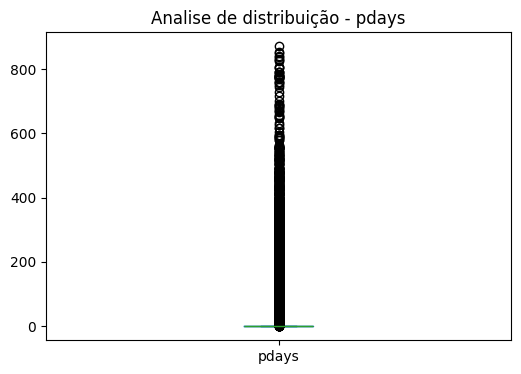

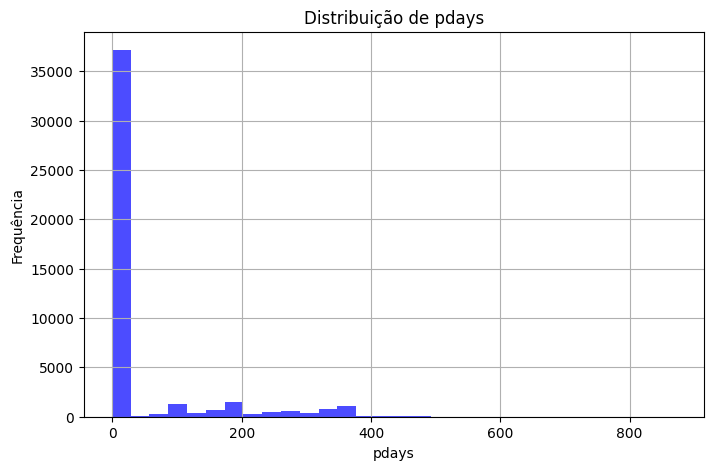

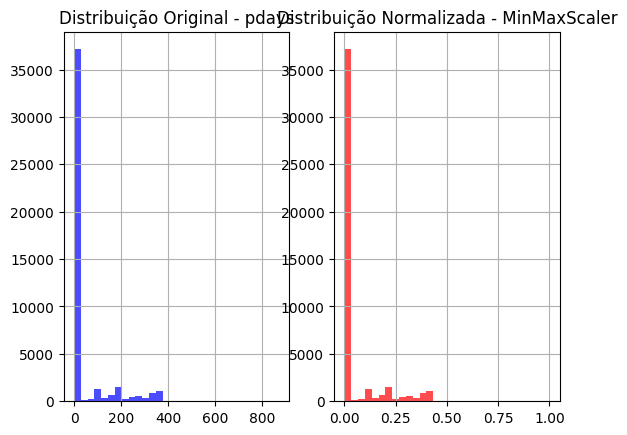

In [11]:
# Boxplot day:
df['pdays'].plot(kind='box', figsize=(6,4))
plt.title("Analise de distribuição - pdays")
plt.show()
# Histograma balance:
df['pdays'].hist(bins=30, figsize=(8,5), alpha=0.7, color='b')
plt.title("Distribuição de pdays")
plt.xlabel("pdays")
plt.ylabel("Frequência")
plt.show()
# Comparação antes e depois do MinMaxScaler
plt.subplot(1,2,1)
df['pdays'].hist(bins=30, alpha=0.7, color='b')
plt.title("Distribuição Original - pdays")
plt.subplot(1,2,2)
df['pdays_normalizado'].hist(bins=30, alpha=0.7, color='r')
plt.title("Distribuição Normalizada - MinMaxScaler")
plt.show()

#### Analisar outliers `previous`

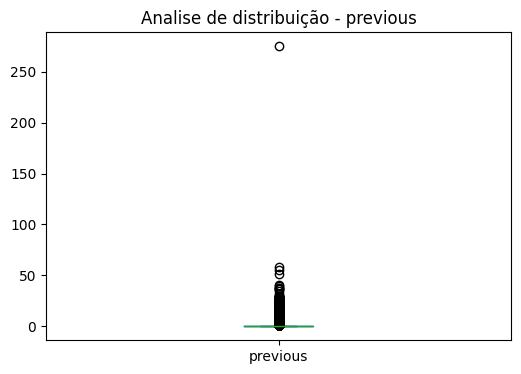

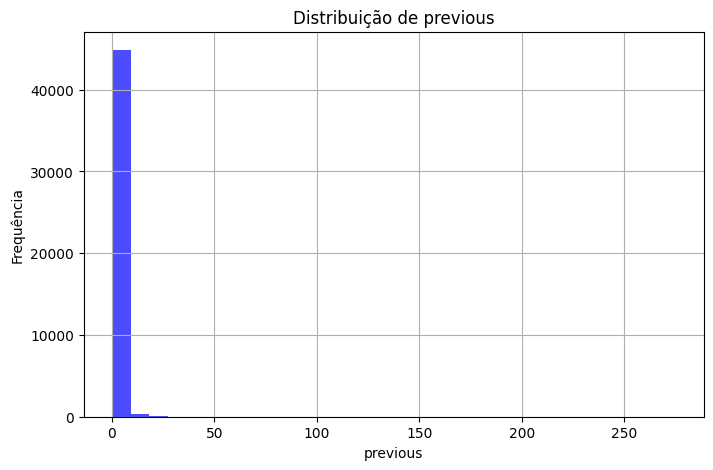

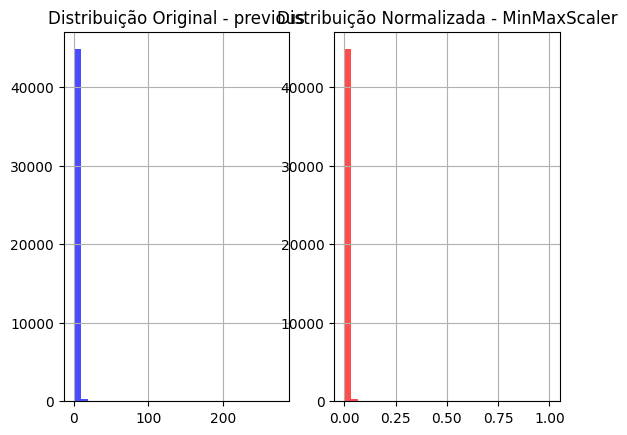

In [12]:
# Boxplot previous:
df['previous'].plot(kind='box', figsize=(6,4))
plt.title("Analise de distribuição - previous")
plt.show()
# Histograma balance:
df['previous'].hist(bins=30, figsize=(8,5), alpha=0.7, color='b')
plt.title("Distribuição de previous")
plt.xlabel("previous")
plt.ylabel("Frequência")
plt.show()
# Comparação antes e depois do MinMaxScaler
plt.subplot(1,2,1)
df['previous'].hist(bins=30, alpha=0.7, color='b')
plt.title("Distribuição Original - previous")
plt.subplot(1,2,2)
df['previous_normalizado'].hist(bins=30, alpha=0.7, color='r')
plt.title("Distribuição Normalizada - MinMaxScaler")
plt.show()

### Preparação dos dados para o modelo
- Realizar a divisão de dados de treino e teste e analise da distribuição da variável alvo;
- Há um desbalanceamento na variavel `y`, então será usada a técnica de balanceamento SMOTE;
- Usar as colunas normalizadas de `age`,`balance`, `day`, `pdays`, `previous`, `campaign` e remover as originais do conjunto de features `X`.

In [13]:
# Definir X (features) e y (variável alvo)
X = df.drop(columns=['y','age','balance', 'day', 'pdays', 'previous', 'campaign' ])
y = df['y']
# Divisão treino/teste com estratificação (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Criar objeto SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

### Treino com XGBoost

In [ ]:
# Definição do grid de hiperparâmetros para otimização do modelo
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Melhor conjunto de hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# GridSearchCV para otimizar XGBoost com dados balanceados
grid_search_bal = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_bal.fit(X_train_bal, y_train_bal)
print("Melhores hiperparâmetros (dados balanceados):", grid_search_bal.best_params_)

# Treinar modelo final com melhores hiperparâmetros (usando dados balanceados)
best_model = XGBClassifier(**grid_search_bal.best_params_)
best_model.fit(X_train_bal, y_train_bal)

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

# Exibir relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Plotar a importância das features
plt.figure(figsize=(10,5))
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.title("Importância das Features no XGBoost")
plt.show()